In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import klib

In [2]:
#### 데이터 확인
df_mall = pd.read_csv('./data/Mall_Customers.csv')

#### 성별 값 숫자형으로 변환 
df_mall = df_mall.replace('Male', 1)
df_mall = df_mall.replace('Female', 2)

count_null_col = df_mall.isnull().sum()
count_null_row = dict(Counter(list(df_mall.isnull().sum(1))))
print(count_null_col)
print(count_null_row)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
{0: 200}


C:\Users\maeng\AppData\Local\Temp\ipykernel_15680\656768029.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mall = df_mall.replace('Female', 2)


결측치가 없다고 확인되어서 엑셀파일도 살펴보았는데.. 실제로 없는것 같다..?

In [3]:
df_mall = df_mall.dropna()

df_mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,2,20,16,6
3,4,2,23,16,77
4,5,2,31,17,40
...,...,...,...,...,...
195,196,2,35,120,79
196,197,2,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


<Axes: title={'center': 'Feature-correlation (pearson)'}>

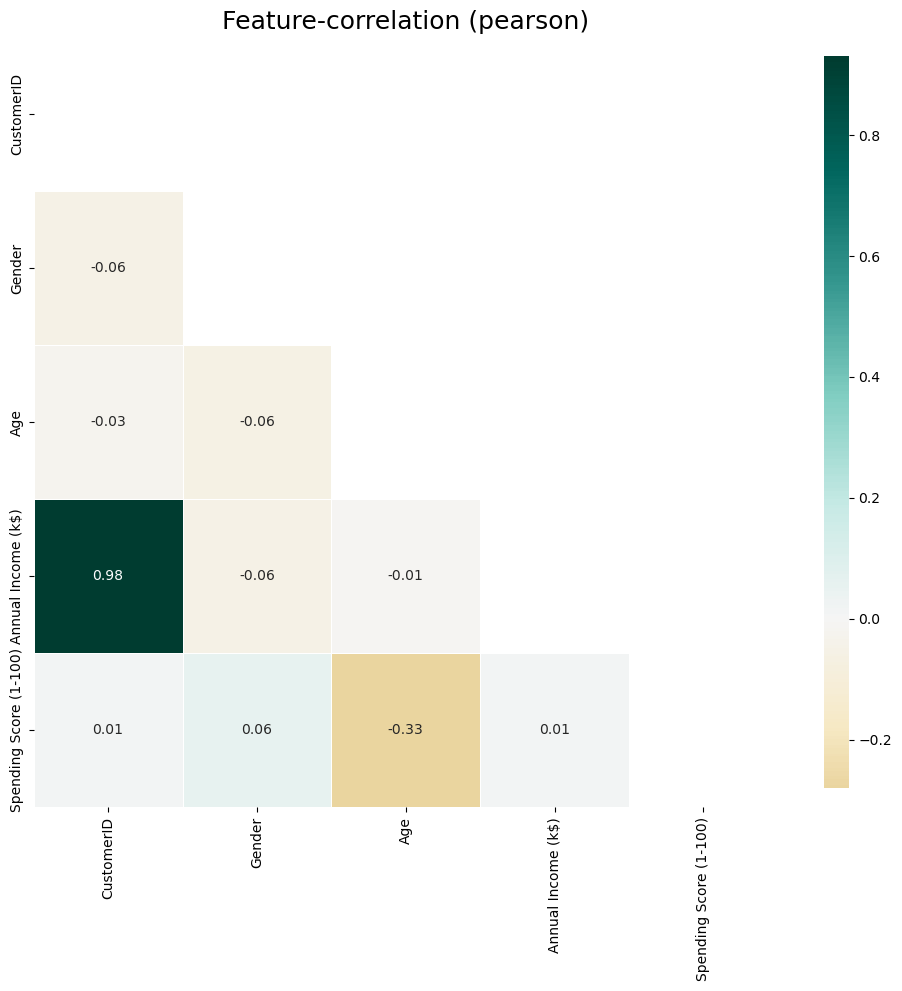

In [4]:
klib.corr_plot(df_mall)

custormer id와 annual income(연간 수입)은 상관도가 높아서 하나의 컬럼으로 보고 둘중 하나를 사용하지 않아도 될 것 같아 보임
예측해야할 spending score와는 그나마 age가 좀 관련있어보임

In [6]:
df_mall = df_mall.drop(columns = 'CustomerID')

df_mall

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40
...,...,...,...,...
195,2,35,120,79
196,2,45,126,28
197,1,32,126,74
198,1,32,137,18


In [7]:
#### 비지도 학습을 위한 데이터 저장
df_mall.to_csv('./data/pp_02_Mall_Customers.csv', index=False)
